##Q1:
Please provide the code to read a csv file into google colab jupyter notebook, the csv file available in a folder of google drive

In [ ]:
from google.colab import drive

# This will prompt you to click on a link and authorize access to your Google Drive.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Replace 'folder_name' with the name of the folder containing your CSV file.
folder_path = "/content/drive/MyDrive/PE/Exp/Demo"


In [ ]:
import pandas as pd

# Replace 'file_name.csv' with the name of your CSV file.
file_path = f'{folder_path}/InputData.csv'

# Read the CSV file into a DataFrame.
df = pd.read_csv(file_path)

# Now, 'df' contains your data from the CSV file.


##Q2:
Please give the code to check the dimensions and summary of the data?


In [ ]:
# Number of rows and columns in the DataFrame
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 15729
Number of columns: 10


In [ ]:
# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(df.head())

# Display the last few rows of the DataFrame
print("Tail of the DataFrame:")
print(df.tail())

# Get a concise summary of the DataFrame, including the data types and memory usage
print("Summary of the DataFrame:")
print(df.info())

# Get descriptive statistics for the numerical columns
print("Summary statistics:")
print(df.describe())


Head of the DataFrame:
   Clothing ID  Age                           Title  \
0          941   46  Beautiful and soft but fragile   
1          834   27                     Flattering!   
2          833   48                             Meh   
3          860   58  Female version of a polo shirt   
4          831   38                    Great blouse   

                                         Review Text  Rating  Recommended IND  \
0  I bought this sweater in the green and loved i...       4                1   
1  Big bust, smallish waist... this top is so cut...       5                1   
2  I wanted to love this top. i really did. the c...       3                0   
3  I ordered this in white. the material is simil...       3                1   
4  In love with this blouse, i first got in ivory...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0         General            Tops   Sweaters  
1              

##Q3:
I do not need the column Clothing ID.  Please drop it.

In [ ]:
columns_to_drop = ['Clothing ID']
df.drop(columns_to_drop, axis=1, inplace=True)


In [ ]:
print(df.head())

   Age                           Title  \
0   46  Beautiful and soft but fragile   
1   27                     Flattering!   
2   48                             Meh   
3   58  Female version of a polo shirt   
4   38                    Great blouse   

                                         Review Text  Rating  Recommended IND  \
0  I bought this sweater in the green and loved i...       4                1   
1  Big bust, smallish waist... this top is so cut...       5                1   
2  I wanted to love this top. i really did. the c...       3                0   
3  I ordered this in white. the material is simil...       3                1   
4  In love with this blouse, i first got in ivory...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0         General            Tops   Sweaters  
1                        0  General Petite            Tops    Blouses  
2                        1  General Petite  

##Q4:
Here are the column names :['Age', 'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name']

**There are 3 numeric variables:** 'Age',  'Positive Feedback Count', 'Rating';

**3 categorical variables**: 'Division Name', 'Department Name', 'Class Name',

**2 Text columns are** 'Title', 'Review Text',

Need to develop a model to predict 'Recommended IND' which contains 1's and 0's by applying embeddings on text columns, embeddings on categorical columns, standardization on numeric columns.

Please help with the code

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'df' is your DataFrame containing the data
# 'Recommended IND' is the target variable

# Step 1: Preprocess the data
X = df.drop('Recommended IND', axis=1)
y = df['Recommended IND']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Preprocess each type of data separately

# Text columns embeddings
# Tokenize and pad the text data
max_sequence_length = 100  # Set the maximum sequence length for padding

# Create a tokenizer and fit it on the combined text columns (Title and Review Text)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['Title'] + ' ' + X_train['Review Text'])

# Convert text data to sequences
X_train_title_seq = tokenizer.texts_to_sequences(X_train['Title'])
X_train_review_seq = tokenizer.texts_to_sequences(X_train['Review Text'])
X_test_title_seq = tokenizer.texts_to_sequences(X_test['Title'])
X_test_review_seq = tokenizer.texts_to_sequences(X_test['Review Text'])

# Pad the sequences to have a consistent length
X_train_title_padded = pad_sequences(X_train_title_seq, maxlen=max_sequence_length, padding='post', truncating='post')
X_train_review_padded = pad_sequences(X_train_review_seq, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_title_padded = pad_sequences(X_test_title_seq, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_review_padded = pad_sequences(X_test_review_seq, maxlen=max_sequence_length, padding='post', truncating='post')

# Categorical columns embeddings
# Using OneHotEncoder to convert categorical columns into binary vectors
cat_columns = ['Division Name', 'Department Name', 'Class Name']
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_cat_encoded = one_hot_encoder.fit_transform(X_train[cat_columns])
X_test_cat_encoded = one_hot_encoder.transform(X_test[cat_columns])

# Standardize numeric columns
num_columns = ['Age', 'Positive Feedback Count', 'Rating']
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_columns])
X_test_num_scaled = scaler.transform(X_test[num_columns])

# Step 3: Combine the processed data
embedding_input_dim = X_train_cat_encoded.shape[1]  # Number of categorical columns after one-hot encoding
title_input_dim = max_sequence_length  # Number of words in the title sequence
review_input_dim = max_sequence_length  # Number of words in the review sequence
numeric_input_dim = X_train_num_scaled.shape[1]  # Number of numeric columns

# Create input layers for each type of data
cat_input = Input(shape=(embedding_input_dim,))
title_input = Input(shape=(title_input_dim,))
review_input = Input(shape=(review_input_dim,))
numeric_input = Input(shape=(numeric_input_dim,))

# Categorical columns embeddings
cat_embedded = Dense(8, activation='relu')(cat_input)

# Text columns embeddings
title_embedded = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=title_input_dim)(title_input)
title_flattened = Flatten()(title_embedded)
review_embedded = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=review_input_dim)(review_input)
review_flattened = Flatten()(review_embedded)

# Numeric columns
numeric_layer = Dense(32, activation='relu')(numeric_input)

# Concatenate all the processed data
concatenated = concatenate([cat_embedded, title_flattened, review_flattened, numeric_layer])

# Add dense layers for prediction
dense_layer = Dense(16, activation='relu')(concatenated)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

# Create the model
model = Model(inputs=[cat_input, title_input, review_input, numeric_input], outputs=output_layer)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit([X_train_cat_encoded, X_train_title_padded, X_train_review_padded, X_train_num_scaled], y_train,
          epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_test_cat_encoded, X_test_title_padded, X_test_review_padded, X_test_num_scaled], y_test)
print(f"Test accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
315/315 [==============================] - 13s 26ms/step - loss: 0.2592 - accuracy: 0.8898 - val_loss: 0.1878 - val_accuracy: 0.9440
Epoch 2/10
315/315 [==============================] - 8s 27ms/step - loss: 0.1600 - accuracy: 0.9600 - val_loss: 0.1737 - val_accuracy: 0.9412
Epoch 3/10
315/315 [==============================] - 6s 20ms/step - loss: 0.1159 - accuracy: 0.9793 - val_loss: 0.1716 - val_accuracy: 0.9368
Epoch 4/10
315/315 [==============================] - 5s 16ms/step - loss: 0.0868 - accuracy: 0.9890 - val_loss: 0.1847 - val_accuracy: 0.9325
Epoch 5/10
315/315 [==============================] - 5s 15ms/step - loss: 0.0704 - accuracy: 0.9918 - val_loss: 0.1787 - val_accuracy: 0.9360
Epoch 6/10
315/315 [==============================] - 4s 13ms/step - loss: 0.0592 - accuracy: 0.9930 - val_loss: 0.1848 - val_accuracy: 0.9344
Epoch 7/10
315/315 [==============================] - 5s 15ms/step - loss: 0.0506 - accuracy: 0.9940 - val_loss: 0.1738 - val_accuracy: 0.936

##Q6:
Please save the trained model?

In [ ]:
from tensorflow.keras.models import save_model

# Assuming 'model' is your trained model
model_path = '/path/to/trained_model.h5'  # Replace with the desired path to save the model

# Save the trained model
model.save(model_path)

print("Trained model is saved.")


Trained model is saved.


##Q7:

I have another data source "NewData.csv" with the same columns.  Please give the code to read that data, pre-process, and predict customer recommendations and compare with the actual values available in the same file

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import load_model

# Assuming 'df' is your original DataFrame containing the training data
# 'Recommended IND' is the target variable

# Load the new data
new_data_path = f'{folder_path}/NewData.csv'  # Replace with the actual path to 'NewData.csv'
new_df = pd.read_csv(new_data_path)

# Separate the target variable ('Recommended IND') from the new data
X_new = new_df.drop('Recommended IND', axis=1)
y_new_actual = new_df['Recommended IND']

# Preprocess the new data similar to the previous steps

# Convert text data to sequences
X_new_title_seq = tokenizer.texts_to_sequences(X_new['Title'])
X_new_review_seq = tokenizer.texts_to_sequences(X_new['Review Text'])

# Pad the sequences to have a consistent length
X_new_title_padded = pad_sequences(X_new_title_seq, maxlen=max_sequence_length, padding='post', truncating='post')
X_new_review_padded = pad_sequences(X_new_review_seq, maxlen=max_sequence_length, padding='post', truncating='post')

# Categorical columns embeddings
# Using OneHotEncoder to convert categorical columns into binary vectors
cat_columns = ['Division Name', 'Department Name', 'Class Name']
X_new_cat_encoded = one_hot_encoder.transform(X_new[cat_columns])

# Standardize numeric columns
num_columns = ['Age', 'Positive Feedback Count', 'Rating']
scaler = StandardScaler()
X_new_num_scaled = scaler.fit_transform(X_new[num_columns])

# Combine the processed data
X_new_final = [X_new_cat_encoded, X_new_title_padded, X_new_review_padded, X_new_num_scaled]

# Load the trained model
model_path = f'{folder_path}/trained_model.h5'  # Replace with the actual path to the trained model
model = load_model(model_path)

# Make predictions on the new data
y_new_pred = model.predict(X_new_final)

# Convert predictions to binary values (0 or 1) based on a threshold (0.5 in this case)
y_new_pred_binary = np.round(y_new_pred).astype(int).flatten()

# Compare predicted values with actual values
comparison_df = pd.DataFrame({'Actual': y_new_actual, 'Predicted': y_new_pred_binary})
print(comparison_df)


123/123 [==============================] - 0s 2ms/step
      Actual  Predicted
0          1          1
1          1          1
2          1          0
3          1          1
4          1          1
...      ...        ...
3928       1          1
3929       1          1
3930       0          0
3931       1          1
3932       1          0

[3933 rows x 2 columns]


##Q8:
Please help with the code to generate table of actual values and predicted values and accuracy measure

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming 'y_new_actual' contains the actual target values for the new data
# Assuming 'y_new_pred_binary' contains the predicted target values for the new data

# Generate a cross table of actual values and predicted values
cross_table = pd.crosstab(y_new_actual, y_new_pred_binary, rownames=['Actual'], colnames=['Predicted'])
print("Cross Table of Actual vs. Predicted:")
print(cross_table)

# Calculate accuracy
accuracy = accuracy_score(y_new_actual, y_new_pred_binary)
print(f"\nAccuracy: {accuracy:.2f}")


Cross Table of Actual vs. Predicted:
Predicted    0     1
Actual              
0          577   138
1          121  3097

Accuracy: 0.93


##Q9:

Help me with a good visualization to compare actual and predicted values

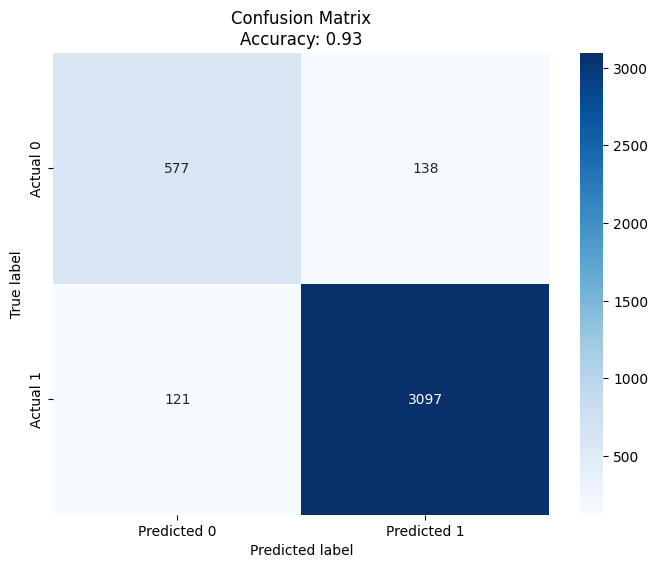

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming 'y_new_actual' contains the actual target values for the new data
# Assuming 'y_new_pred_binary' contains the predicted target values for the new data

# Generate a confusion matrix
cm = confusion_matrix(y_new_actual, y_new_pred_binary)

# Calculate accuracy
accuracy = accuracy_score(y_new_actual, y_new_pred_binary)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()


##Q10:
I do not want cross tab.  I wany counts of 1 and 0's compared between actual and predicted files.

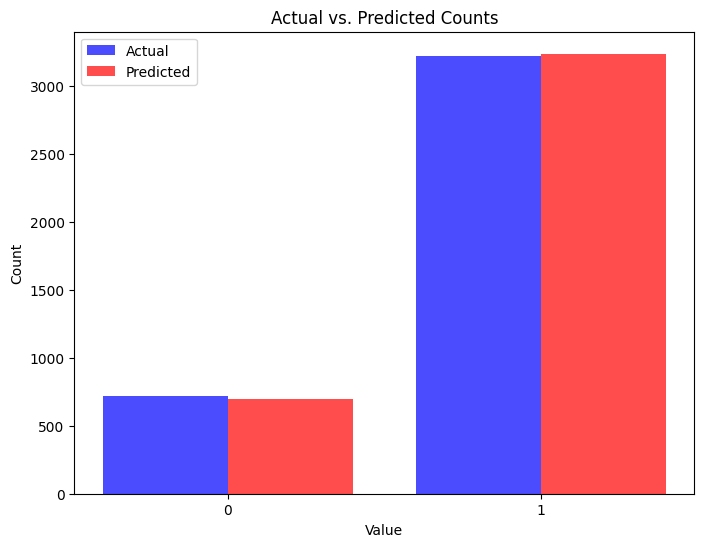

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'y_new_actual' contains the actual target values for the new data
# Assuming 'y_new_pred_binary' contains the predicted target values for the new data

# Create a DataFrame with the actual and predicted values
df_compare = pd.DataFrame({'Actual': y_new_actual, 'Predicted': y_new_pred_binary})

# Count the occurrences of 1's and 0's for actual and predicted values
counts_actual = df_compare['Actual'].value_counts()
counts_predicted = df_compare['Predicted'].value_counts()

# Create side-by-side bar plots
plt.figure(figsize=(8, 6))
bar_width = 0.4
index = counts_actual.index
plt.bar(index - bar_width/2, counts_actual.values, bar_width, label='Actual', color='b', alpha=0.7)
plt.bar(index + bar_width/2, counts_predicted.values, bar_width, label='Predicted', color='r', alpha=0.7)
plt.xticks(index)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Counts')
plt.legend()
plt.show()
